In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os
import random
import datetime
import re
import json

In [1]:
import sys
sys.path.append("../src")

from gentopo.topology import generate
generate

<module 'gentopo.topology.generate' from '/Users/metis/Projects/cicl/code/gentopo/scripts/../src/gentopo/topology/generate.py'>

In [2]:
from src import generate
from src import validate_config

validate_config("moralnet")
graph = generate("moralnet", test=False, write=False)

ModuleNotFoundError: No module named 'src'

In [6]:
import random
from itertools import chain
rounds = 3
dyads = [(u,v) for (u,v) in graph.edges]
interaction_sequence = []
tries = 5000

# This is 8 for n = 16
ideal_matching_size = round(len(graph.nodes()) / 2)
tries_since_ideal_matching = 0

print(f"Total available dyads: {len(dyads)}")

while tries:
    
    matching = set()
    matching.add(random.choice(dyads))

    nodes_in_matching = set(chain(*matching))

    for dyad in dyads:
        u,v = dyad
        if u not in nodes_in_matching and v not in nodes_in_matching:
            matching.add((u,v))
            nodes_in_matching.update({u,v})

    if len(matching) == ideal_matching_size:
        interaction_sequence.append(matching)
        print("Matching added to sequence")
        for matched in matching:
            dyads.remove(matched)
        print(f"{len(dyads)} remain for matching")
        if len(interaction_sequence) == rounds:
            break
    
    if tries_since_ideal_matching > 1000:
        ideal_matching_size -= 1
        print(f"new ideal matching size: {ideal_matching_size}")
        tries_since_ideal_matching = 0
    
    tries -= 1
    tries_since_ideal_matching += 1

print(f"Interaction sequence for {rounds} rounds found:")
interaction_sequence

Total available dyads: 32
Matching added to sequence
24 remain for matching
new ideal matching size: 7
Matching added to sequence
17 remain for matching
Matching added to sequence
10 remain for matching
Interaction sequence for 3 rounds found:


[{(0, 14), (1, 3), (2, 12), (4, 5), (6, 7), (8, 15), (9, 10), (11, 13)},
 {(0, 1), (2, 3), (4, 6), (5, 7), (8, 14), (10, 12), (11, 15)},
 {(0, 15), (1, 6), (2, 5), (3, 4), (7, 8), (10, 11), (12, 14)}]

In [10]:
graph.edges

EdgeView([(0, 1), (0, 15), (0, 2), (0, 14), (0, 13), (1, 3), (1, 6), (2, 3), (2, 12), (2, 5), (2, 13), (3, 4), (3, 5), (3, 15), (4, 5), (4, 6), (5, 6), (5, 7), (5, 14), (6, 7), (6, 14), (7, 8), (7, 9), (8, 15), (8, 14), (8, 9), (9, 10), (10, 11), (10, 12), (11, 13), (11, 15), (12, 14)])

In [12]:
graph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))

In [13]:
graph.degree()

DegreeView({0: 5, 1: 3, 2: 5, 3: 5, 4: 3, 5: 6, 6: 5, 7: 4, 8: 4, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 5, 15: 4})

In [14]:
degrees = [deg for (node, deg) in graph.degree()]

In [16]:
range(degrees)

TypeError: 'list' object cannot be interpreted as an integer

In [17]:
[min(degrees), max(degrees)]

[3, 6]

In [18]:
import statistics

In [21]:
statistics.median(degrees)

4.0

In [49]:
insufficient = True
while insufficient:    
    graph = nx.connected_watts_strogatz_graph(16, 4, 0.2, tries=100)
    degrees = [deg for (node, deg) in graph.degree()]
    print(degrees)
    if [min(degrees), max(degrees)] == [2, 4]:
        insufficient = False

nx.smallworld.omega(graph)

KeyboardInterrupt: 

-0.4254407261815674


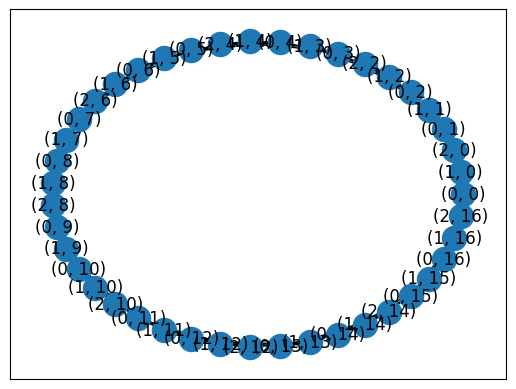

In [62]:
test_graph = nx.triangular_lattice_graph(16,3)
print(nx.omega(test_graph))
nx.draw_networkx(test_graph,nx.circular_layout(test_graph))

In [67]:
starter = nx.path_graph(16)
starter.edges

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15)])

In [68]:
edge_list = []
for node in starter.nodes:
    if node > len(starter.nodes) - 2:
        edge_list.append((node, ))
    edge_list.append((node, node + 2))
starter.add_edges_from(edge_list)
starter

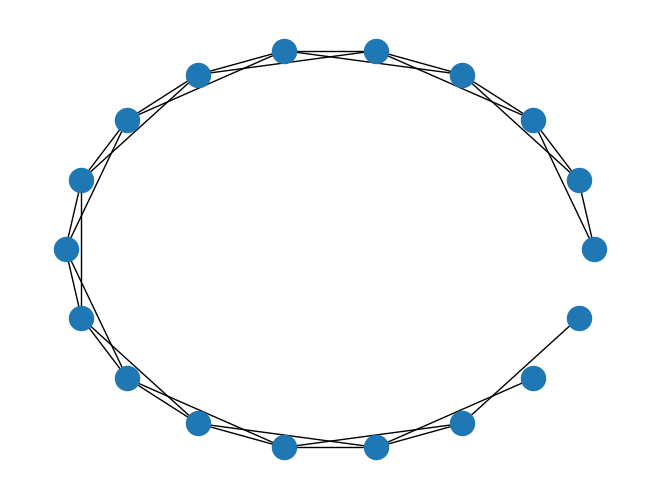

In [69]:
nx.draw_circular(starter)

In [76]:
16 // 2

8